This notebook tries to check if the recorded coordinates are well interpreted

In [6]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt
import augment

In [2]:
# .csv data file created by the annotate.py script where coordinates for the Weber Length are stored
csv_file_path = "coords.csv"

# Open the CSV file and read its contents into a dictionary
# The stored data is: picture_name, x1, y1, x2, y2 
with open(csv_file_path, mode='r') as file:
    reader = csv.DictReader(file)  # Use DictReader to automatically map rows to dictionaries
    data = [row for row in reader]  # Convert each row into a dictionary and store in a list

In [3]:
# Create a channel that has activated pixels around point1 point2

def create_channel(point1, point2, shape=(50, 100), radius=2):
    """
    Creates an image channel of the given shape where circles of a given radius
    around point1 and point2 are set to 255, and the rest are zeros.

    Args:
        point1 (tuple): Coordinates (x, y) for the first point.
        point2 (tuple): Coordinates (x, y) for the second point.
        shape (tuple): Shape of the output channel (height, width).
        radius (int): Radius of the circles to draw around the points.

    Returns:
        numpy.ndarray: A 2D array representing the channel.
    """
    # Create a blank channel
    channel = np.zeros(shape, dtype=np.uint8)

    # Helper function to draw a circle around a point
    def draw_circle(center, radius):
        cx, cy = center
        y, x = np.ogrid[:shape[0], :shape[1]]  # Create grid of coordinates
        distance = (x - cx)**2 + (y - cy)**2  # Compute squared distances from center
        mask = distance <= radius**2  # Define the circular mask
        channel[mask] = 255  # Apply mask to set values to 255

    # Draw circles around the provided points
    draw_circle(point1, radius)
    draw_circle(point2, radius)

    return channel


In [4]:
def add_point_channel(img, x1, y1, x2, y2):
    # Create a channel to visualise the points
    point_channel = create_channel((x1, y1), (x2, y2))

    # Turn one-channel simplified image to 3 channels
    rgb = np.stack([img] * 3, axis=-1)
        
    # Integrate our channel that represents the points into the image
    red_channel = rgb[:, :, 0]
    red_channel = np.maximum(red_channel, point_channel)
    rgb[:, :, 0] = red_channel

    return rgb

[[22.440587997436523, 17.28256607055664], [45.621177673339844, 10.079667091369629]]
(50, 100, 3)


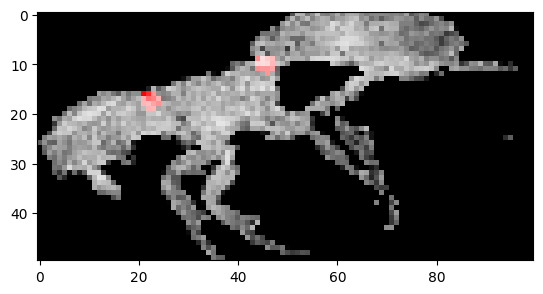

[[41.0630989074707, 8.046744346618652], [64.1878890991211, 15.14428997039795]]
(50, 100, 3)


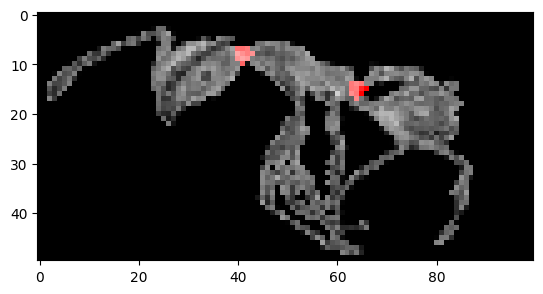

[[23.769750595092773, 13.256019592285156], [60.783599853515625, 14.781513214111328]]
(50, 100, 3)


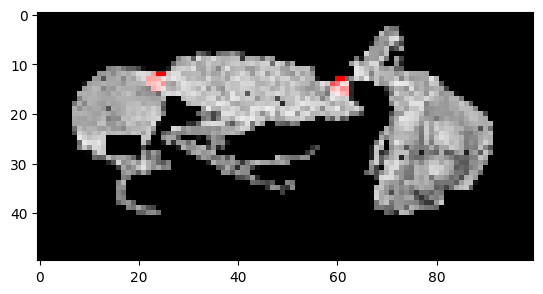

[[32.33300018310547, 15.373281478881836], [57.3701171875, 16.782100677490234]]
(50, 100, 3)


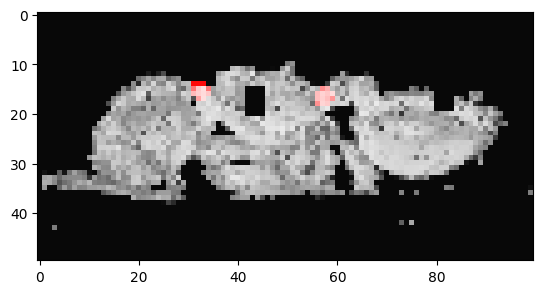

[[28.947263717651367, 4.217149257659912], [58.426856994628906, 19.17371940612793]]
(50, 100, 3)


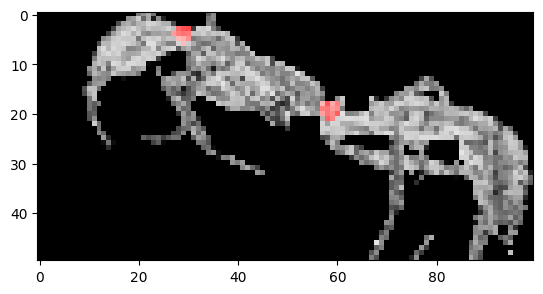

[[35.65639877319336, 12.106118202209473], [75.44770050048828, 15.048039436340332]]
(50, 100, 3)


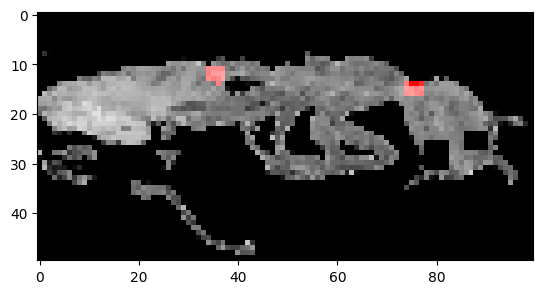

[[28.631027221679688, 16.038475036621094], [52.73804473876953, 32.61576843261719]]
(50, 100, 3)


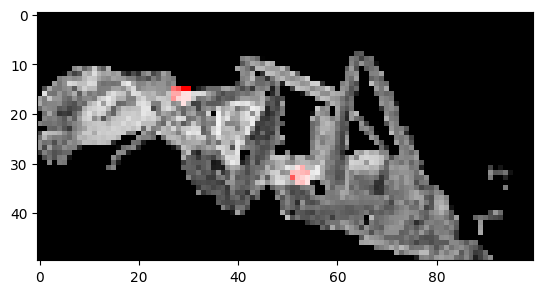

[[41.20209884643555, 8.583390772762856], [69.59012603759766, 12.503674863448436]]
(50, 100, 3)


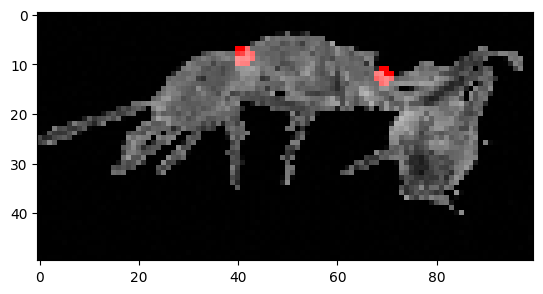

[[26.196895599365234, 19.538089752197266]]
[[28.368356390797942, 13.712122888848333]]
[[28.98838233947754, 9.455610275268555], [59.33669662475586, 12.883864402770996]]
(50, 100, 3)


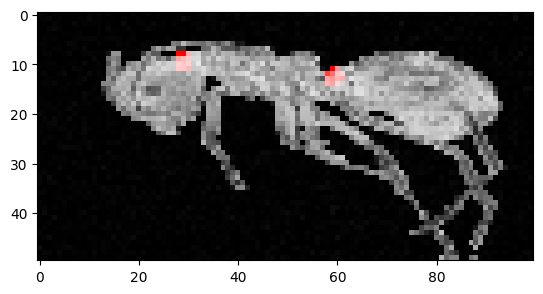

[[31.13763999938965, 11.93921184539795], [64.29997253417969, 12.176467895507812]]
(50, 100, 3)


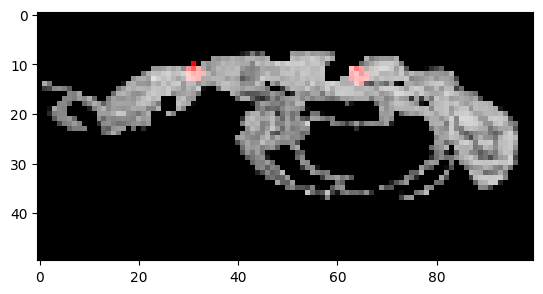

[[28.877444813409827, 10.168423983130124], [64.14094691785972, 6.8285998731556505]]
(50, 100, 3)


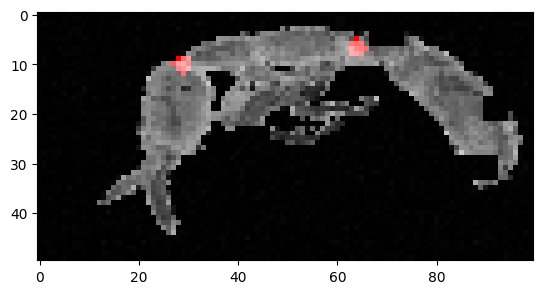

[[23.144079208374023, 15.710482597351074], [52.71864700317383, 22.150712966918945]]
(50, 100, 3)


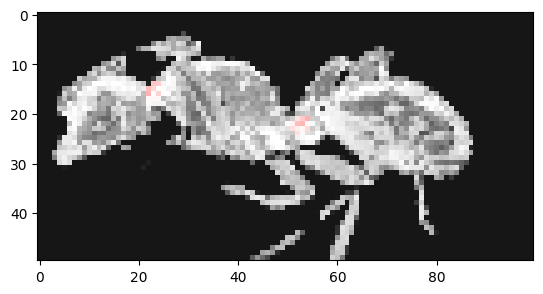

[[15.17754077911377, 19.25102424621582], [51.019264221191406, 15.06624698638916]]
(50, 100, 3)


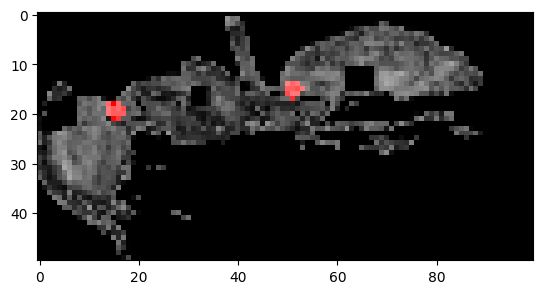

[[22.22185516357422, 12.468220710754395], [70.23710632324219, 13.147960662841797]]
(50, 100, 3)


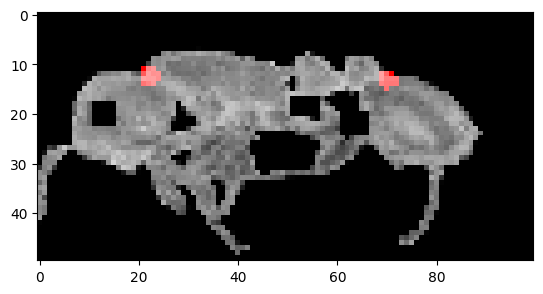

[[37.63209533691406, 15.836241722106934], [60.21841049194336, 21.71807861328125]]
(50, 100, 3)


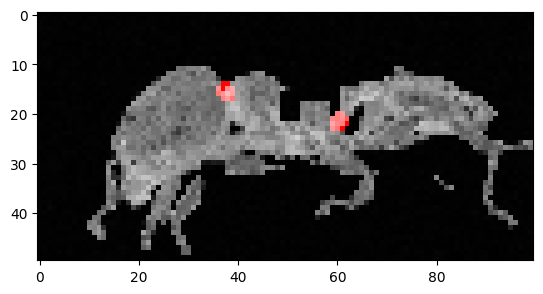

[[74.80126190185547, 12.907814025878906], [42.477725982666016, 13.53015422821045]]
(50, 100, 3)


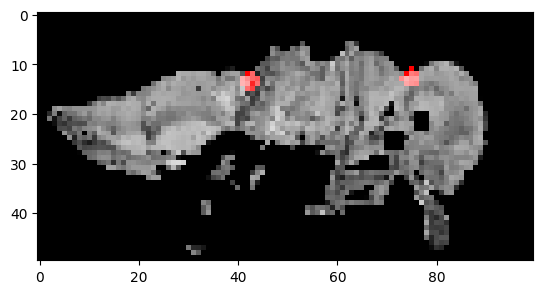

[[13.469514846801758, 15.913104057312012], [47.98483657836914, 15.771859169006348]]
(50, 100, 3)


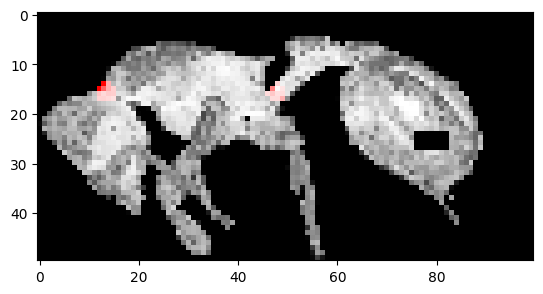

[[15.811783790588379, 9.523428916931152], [55.90138244628906, 11.418085098266602]]
(50, 100, 3)


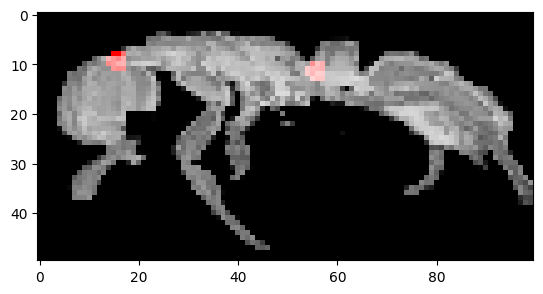

[[23.12642478942871, 12.773876190185547], [60.10799026489258, 16.233278274536133]]
(50, 100, 3)


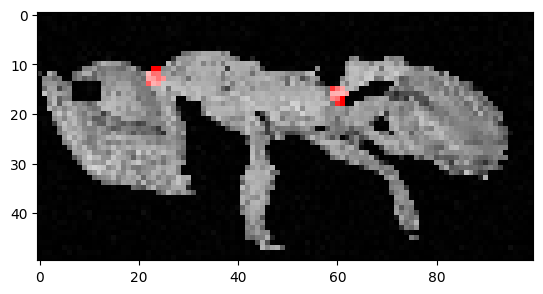

[[31.273374557495117, 11.891742706298828], [64.93828582763672, 15.963224411010742]]
(50, 100, 3)


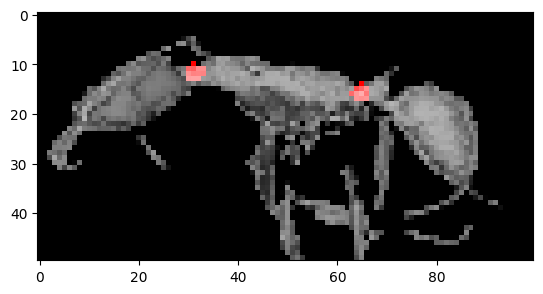

[[37.23387908935547, 4.3225836753845215], [37.23387908935547, 4.3225836753845215]]
(50, 100, 3)


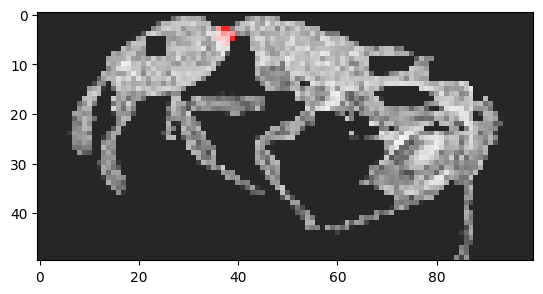

[[16.450632095336914, 9.603991508483887], [60.74699783325195, 12.01983642578125]]
(50, 100, 3)


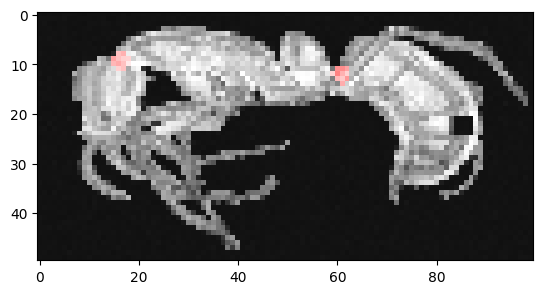

[[70.17619323730469, 10.089791297912598], [49.54810333251953, 21.341569900512695]]
(50, 100, 3)


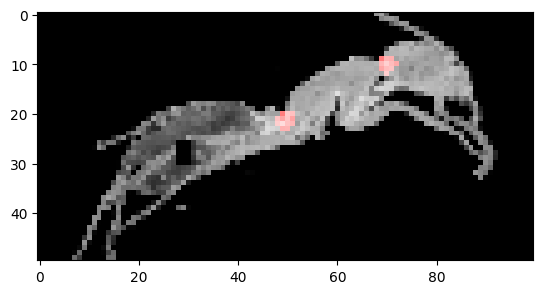

[[26.294879913330078, 9.801763534545898], [58.398983001708984, 13.251009941101074]]
(50, 100, 3)


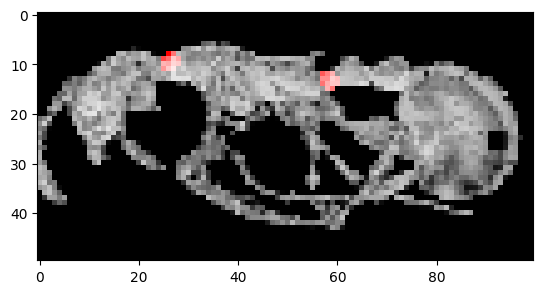

[[32.104793548583984, 16.647525787353516], [62.21311569213867, 22.18669891357422]]
(50, 100, 3)


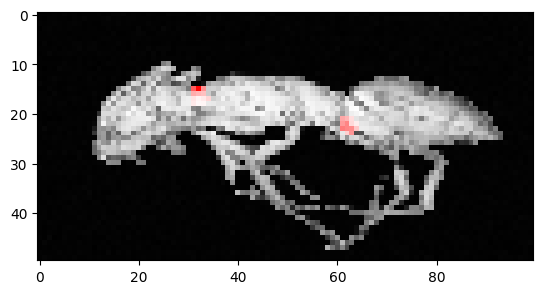

[[13.636832237243652, 12.854148864746094], [54.97496795654297, 15.70909309387207]]
(50, 100, 3)


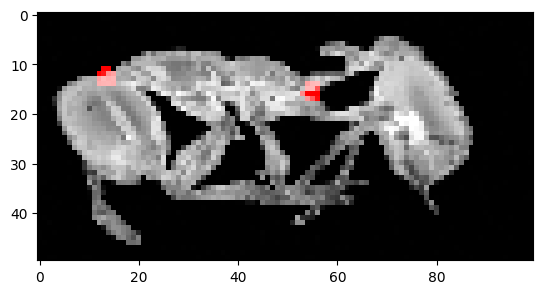

[[15.671178817749023, 7.515562534332275], [50.03214645385742, 14.949049949645996]]
(50, 100, 3)


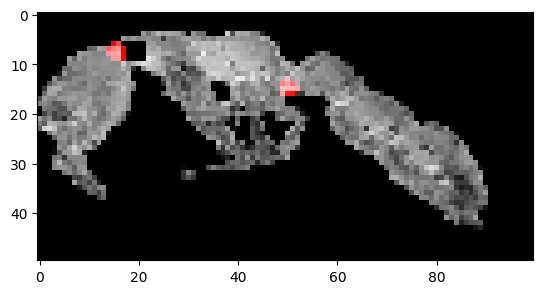

[[46.991336822509766, 10.312371253967285], [72.87185668945312, 16.48017120361328]]
(50, 100, 3)


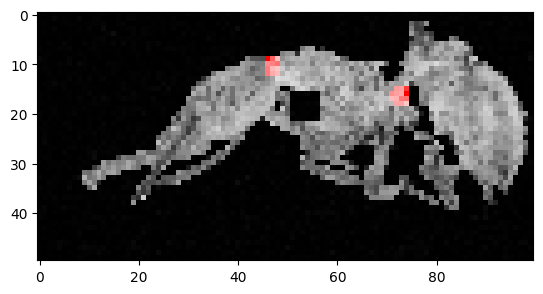

[[42.022606898248995, 6.082159929936475], [62.85896744442583, 15.983013115306893]]
(50, 100, 3)


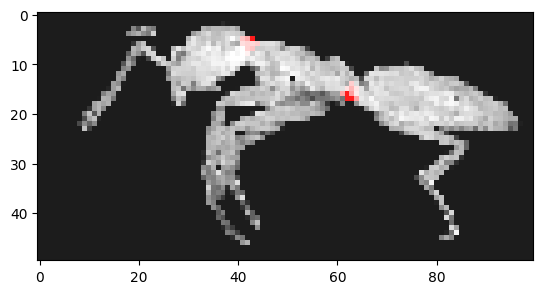

In [5]:
# Add the image to the image_data dictionnary (seemed more convenient but might actually be stupid)
for image_data in data:
    name = image_data["Image Name"]
    img_path = os.path.join("clean", name)
    x1, y1 = image_data["x1"], image_data["y1"]
    x2, y2 = image_data["x2"], image_data["y2"]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    img, keypoints = augment.prepare_for_model(img_path, [(x1, y1), (x2, y2)])

    print(keypoints)

    if len(keypoints) == 2:
        rgb = add_point_channel(img, keypoints[0][0], keypoints[0][1], keypoints[1][0], keypoints[1][1])
        print(rgb.shape)

        plt.plot()
        plt.imshow(rgb, cmap = "gray")
        plt.show()


Success !!